# Exploring ERA5 dataset using CDS and Magics

## First import Magics, cdsapi and the other libraries
At ECMWF make sure that Magics and cdsapi are loaded.  
Documentation about **cdsapi** can be find [here](https://cds.climate.copernicus.eu/api-how-to.com "CDS API how to")

In [1]:
import Magics.macro as magics
import cdsapi
import datetime
import ipywidgets as widgets
from ipywidgets import Layout, Button, Box, VBox

`menus.py` contains the code got menus to choose parameter, type, date and time..  
We're just gonna run it here so our nice widgets work, but the code is not important for this excersize.

In [2]:
%run -i 'menus.py'

display(group)
display(VBox([box_auto]))



Dropdown(description='Group:', options={'Temperature and pressure': ['2m_dewpoint_temperature', '2m_temperatur…

Here we have code for CDS API request.  
It uses parameters we have chosen before, so we don't have to change the code and so we reduce the posibility of an error.  
At the moment this request only works for surface fields, and there is separate Notebook for pressure levels fields. In future it might be merged in one Notebook.

In [50]:
c = cdsapi.Client()

a = c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'variable':[
            parameters.value
        ],
            'grid': ['0.2', '0.2'],
            'product_type': Type.value,
            'year': dates.value.year,
            'month': dates.value.month,
            'day': dates.value.day,
            'time': times.value,
        'format':'grib'
    },
                "download.grib"
    )

2018-10-09 14:30:18,321 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2018-10-09 14:30:18,347 INFO Request is queued
2018-10-09 14:30:19,355 INFO Request is running
2018-10-09 14:30:20,863 INFO Request is completed
2018-10-09 14:30:20,863 INFO Downloading http://136.156.132.110/cache-compute-0003/cache/data1/adaptor.mars.internal-1539091819.7059243-20582-12-71f28140-9992-4e41-a6ea-acb5648b33a1.grib to download.grib (3.1M)
2018-10-09 14:30:20,936 INFO Download rate 43.2M/s


### Load grib data:
More about loading grib files in Magics can be found [here](https://confluence.ecmwf.int/display/MAGP/Grib+Input "GRIB input")

In [3]:
data =  magics.mgrib(grib_input_file_name  = 'download.grib')

### Load predefined ECMWF contour setting:
Setting the parameter **contour_automatic_setting** to **'ecmwf'** will give us style developed at ECMWF for this parameter.  

More about contour settings in Magics can be found [here](https://confluence.ecmwf.int/display/MAGP/Contouring "Contouring")  

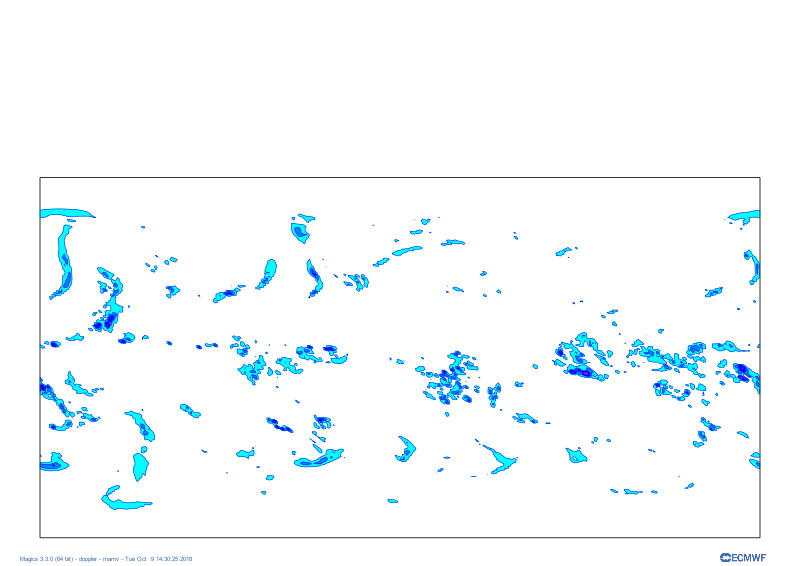

In [52]:
contour = magics.mcont(contour_automatic_setting = 'ecmwf')

magics.plot(data, contour)

Some ERA5 parameters (that have representation in ecCharts) have more than one built in predefined styles. Run the next cell and choose a style.

In [53]:
styles = magics.wmsstyles(data, )
all_styles = []
for i in styles['styles']:
    all_styles.append(i["name"])

One_style = widgets.Dropdown(options=all_styles, value = all_styles[0], description='Choose a style:', style=style)
display(One_style)


Dropdown(description='Choose a style:', options=('sh_blured_f05t300lst', 'sh_blured_f1t100lst', 'sh_blured_f1t…

To use this new feature we need to set the parameter **contour_automatic_setting** to **'style_name'**, and add a new parameter **contour_style_name** with the chosen style. In this example it takes value choosen by the previous menu.

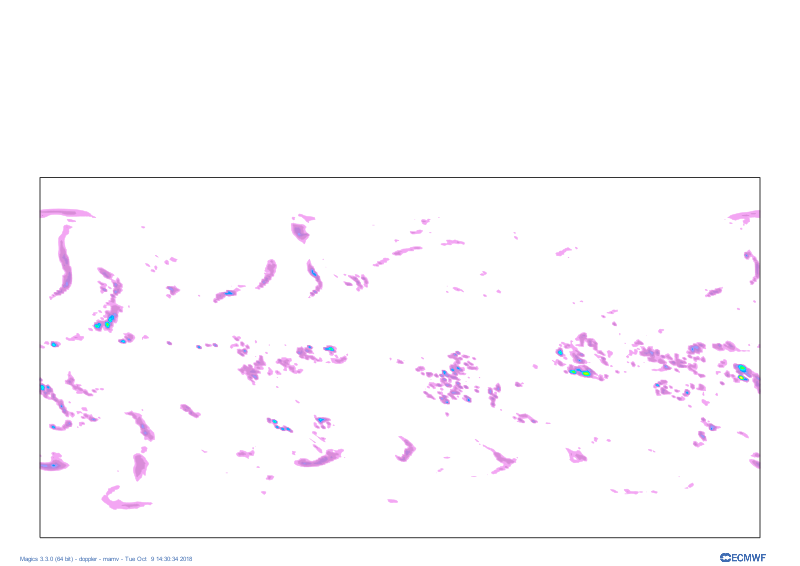

In [54]:
contour = magics.mcont(contour_automatic_setting = 'style_name',
                      contour_style_name = One_style.value)

magics.plot(data, contour)

### Adding coastlines, gridlines and default title
Unfortunately, previous image lacks coastlines, so in order to continue lets add default coastline definition.  
We can also add the default title. It is useful as it's showing us basic info about our grib field without having to use additional software or write code.

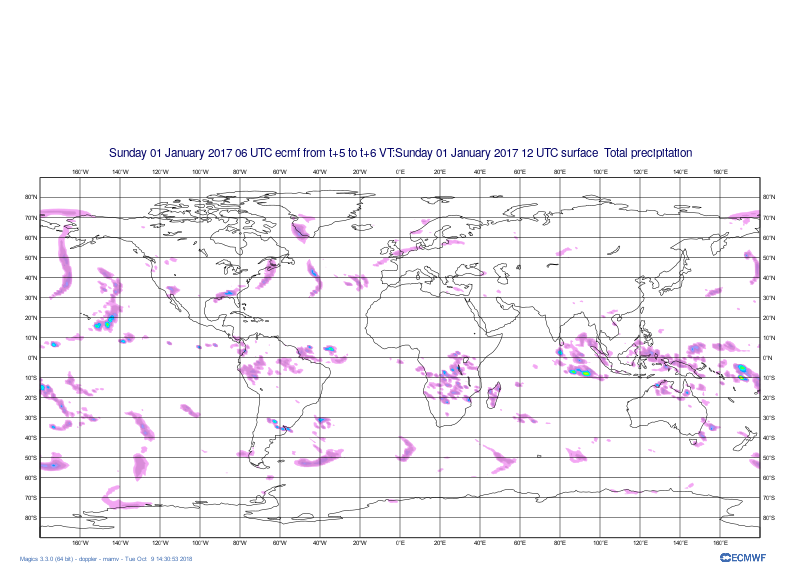

In [55]:
magics.plot(data, contour, magics.mcoast(), magics.mtext())

We can also define our own coastline style by adding boundaries, rivers, setting coastline resolution, grid frequency and many other things.  
All **mcoast** parameters, as well as some examples can be found [here](https://confluence.ecmwf.int/display/MAGP/Coastlines "Coastlines")   

In [59]:
coast = magics.mcoast(map_grid =  "on",
                      map_grid_colour  =  "charcoal",
                      map_coastline  =  'on',
                      map_coastline_colour =  'navy',
                      map_boundaries = 'on',
                      map_boundaries_colour = 'navy',
                      map_coastline_resolution = 'high'
            )

Magics also has a number of predefined areas.  
To use them, set **subpage_map_library_area** to **"on"** and then give **subpage_map_area_name** the value of chosen area.    

Run the next cell and choose the area from dropdown menu, and it will be set to subpage_map_area_name.  

Then run the cell below to plot data in your chosen area and projection.

In [61]:
areas = magics.predefined_areas()
Area = widgets.Dropdown(options=areas, value = 'europe', description='Predefined areas:', style=style)
display(Area)

Dropdown(description='Predefined areas:', index=15, options=('north_pole', 'eurasia', 'global', 'south_west_eu…

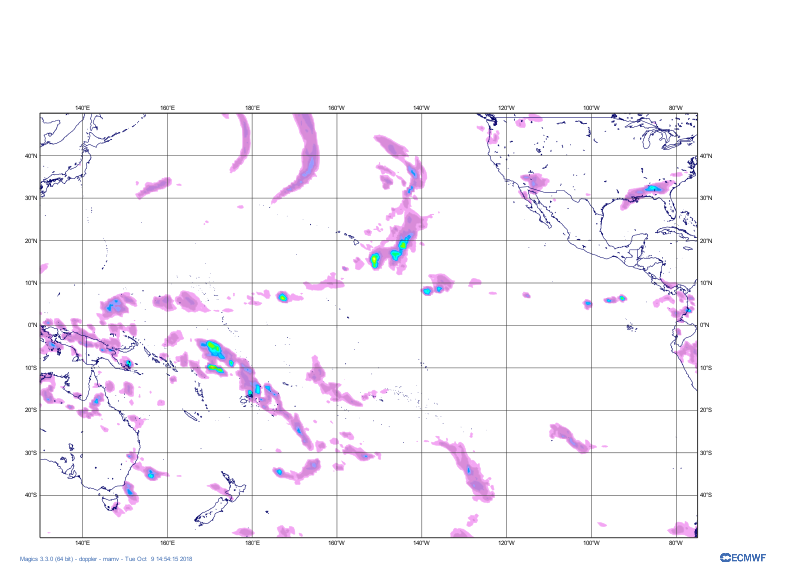

In [62]:
projection = magics.mmap(
    subpage_map_library_area = "on",
    subpage_map_area_name = Area.value
)

magics.plot(projection, data, contour, coast)

If we don't like any of the areas, we can define our own projection.  
All **mmap** parameters, as well as some examples can be found [here](https://confluence.ecmwf.int/display/MAGP/Subpage+-+Projection "Projections") 

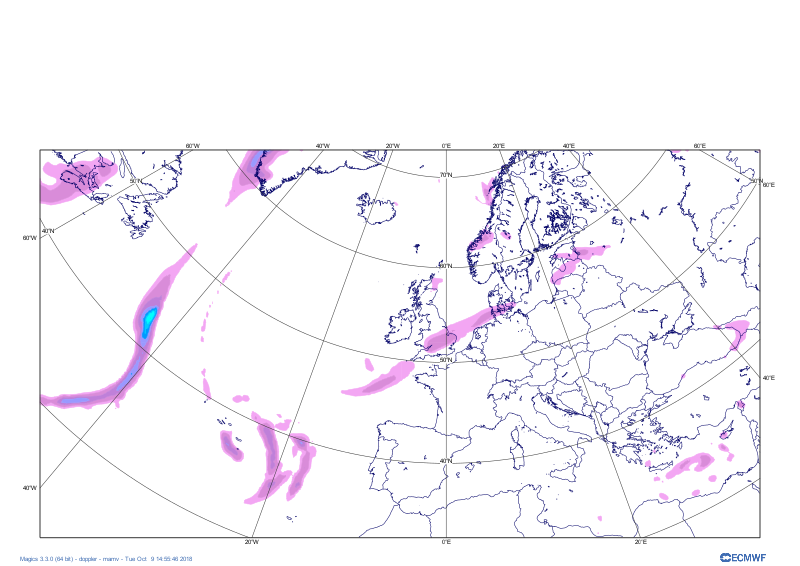

In [63]:
projection = magics.mmap(subpage_lower_left_longitude = -37.27,
     subpage_upper_right_longitude = 65.00,
     subpage_upper_right_latitude = 51.28,
     subpage_map_projection = "polar_stereographic",
     subpage_lower_left_latitude = 21.51)

magics.plot(projection, data, contour, coast)

### To conclude, to inspect grib data using Magics this is all the code you need:

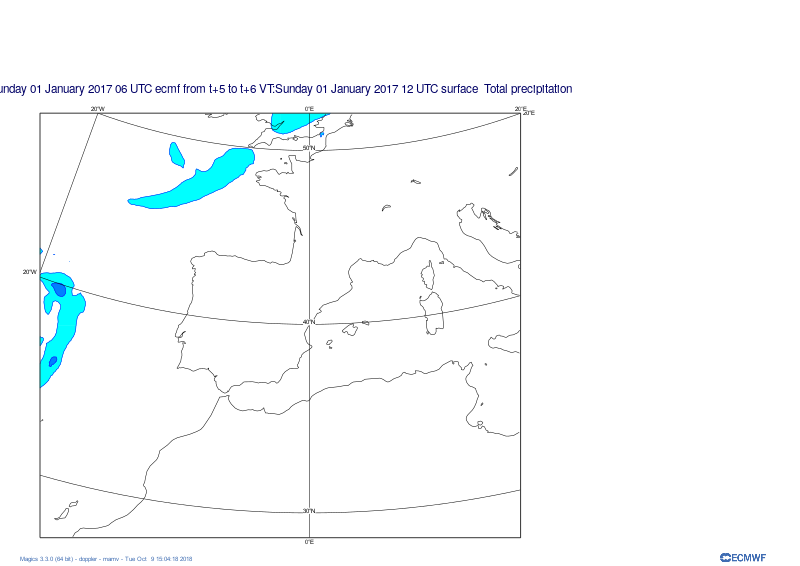

In [64]:
import Magics.macro as magics

data =  magics.mgrib(grib_input_file_name  = 'download.grib', grib_field_position = 1)

contour = magics.mcont(contour_automatic_setting = 'ecmwf')

projection = magics.mmap(
    subpage_map_library_area = "on",
    subpage_map_area_name = "south_west_europe"
)

magics.plot(projection, data, contour, magics.mcoast(), magics.mtext())